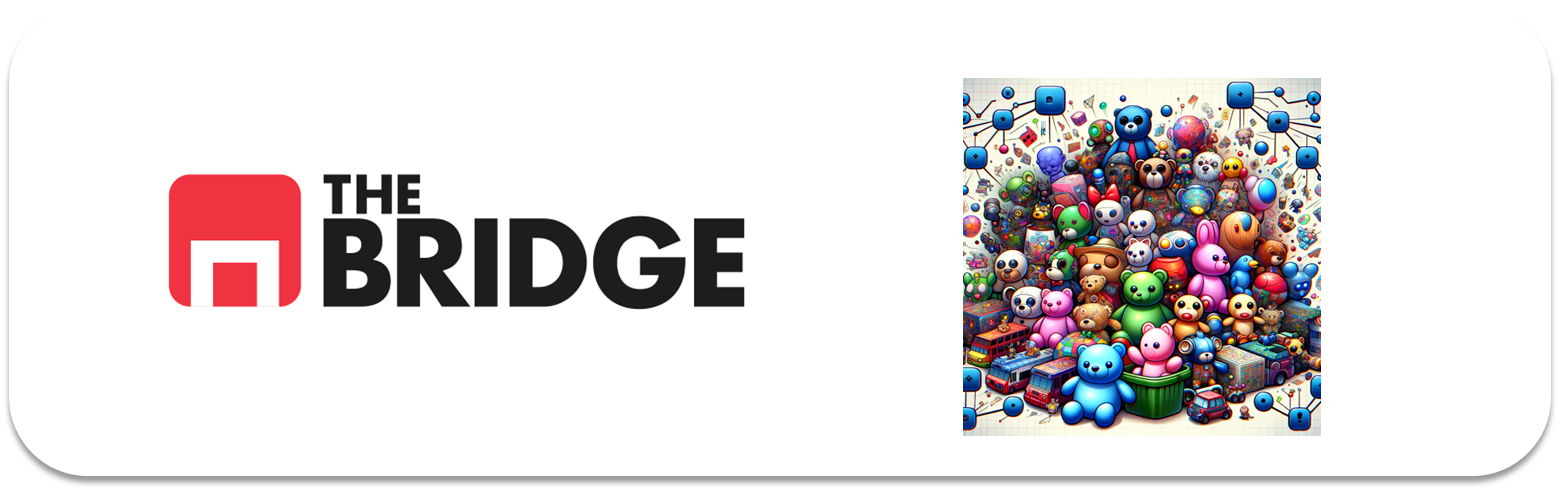

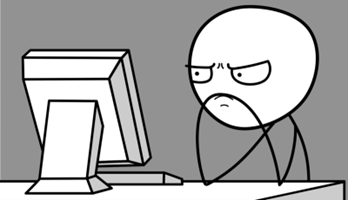

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [32]:
# Cargar los datos
data_path="./data/empowering_drinks.csv"
data= pd.read_csv(data_path, sep="|")

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


None

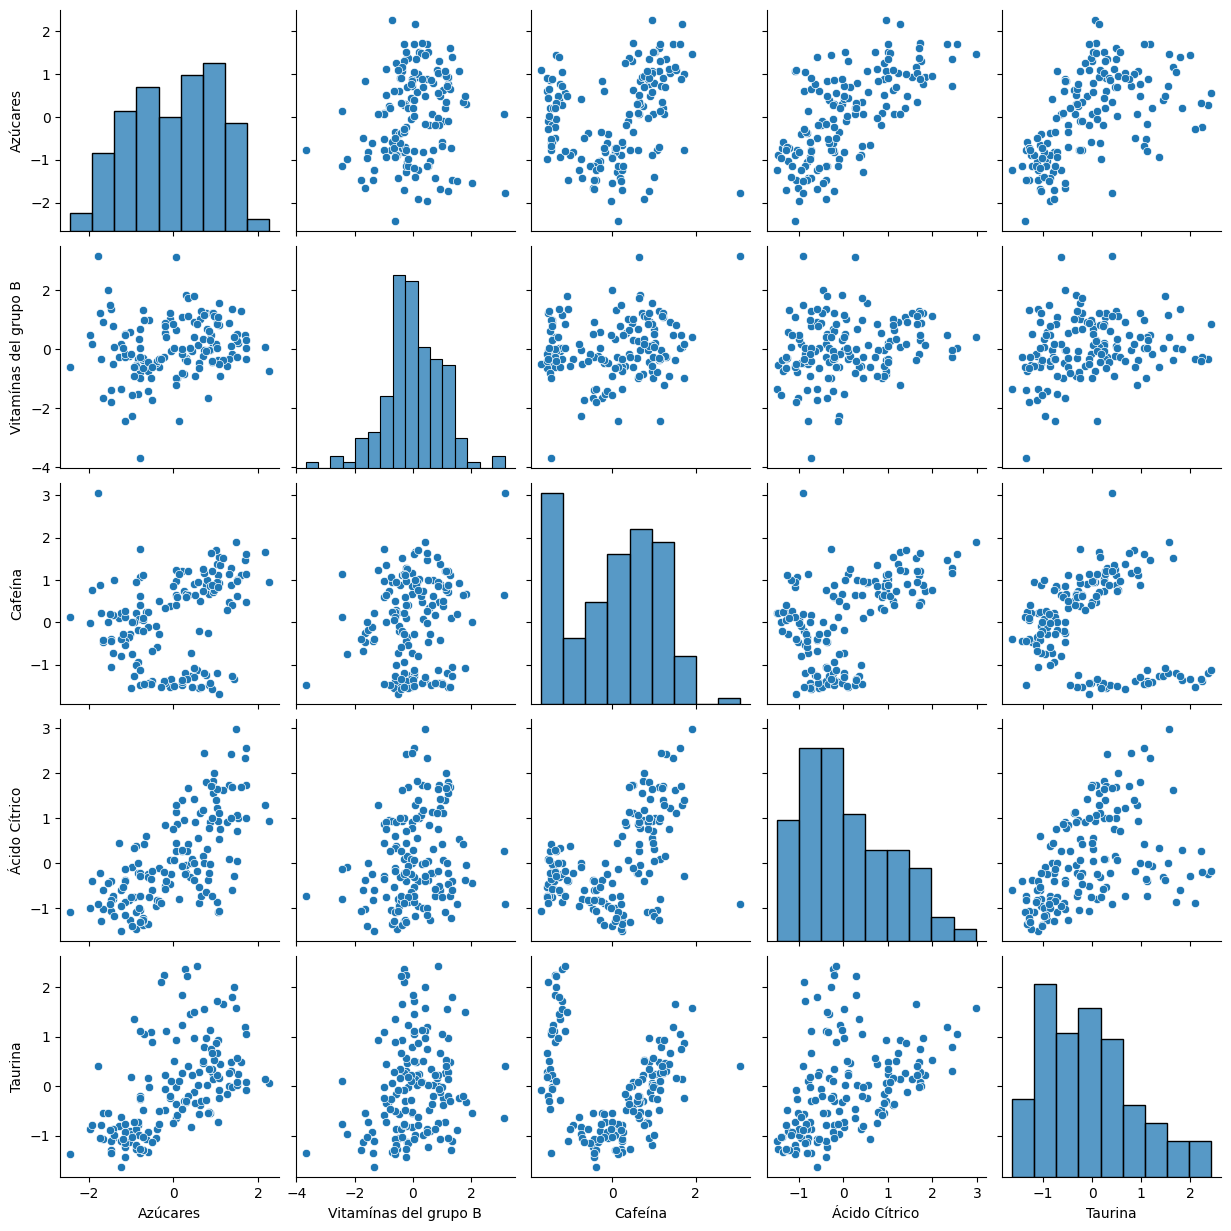

Azúcares  Vitamínas del grupo B     Cafeína  Ácido Cítrico  \
count  153.000000             153.000000  153.000000     153.000000   
mean     0.019231               0.037273    0.041057       0.080022   
std      1.026182               0.995984    1.040928       1.009450   
min     -2.434235              -3.679162   -1.695971      -1.493188   
25%     -0.816038              -0.499016   -1.043392      -0.738463   
50%      0.061000              -0.023821    0.211566      -0.165254   
75%      0.876275               0.707247    0.894264       0.917474   
max      2.259772               3.156325    3.062832       2.971473   

          Taurina  
count  153.000000  
mean    -0.044088  
std      0.934399  
min     -1.634288  
25%     -0.799428  
50%     -0.154899  
75%      0.493956  
max      2.431870

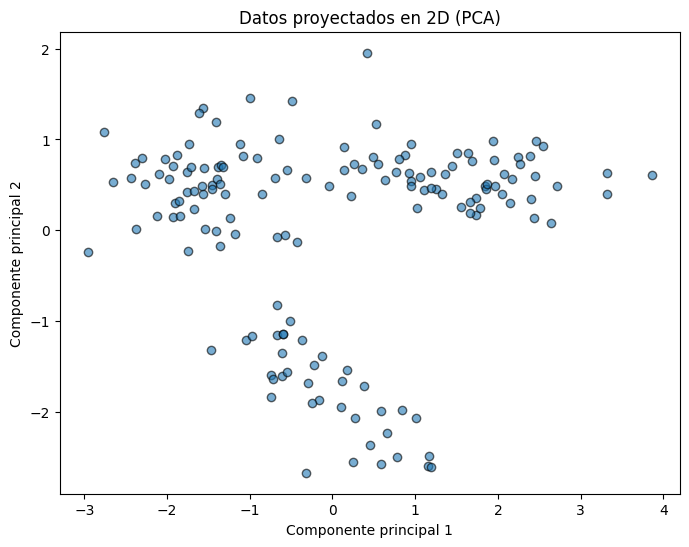

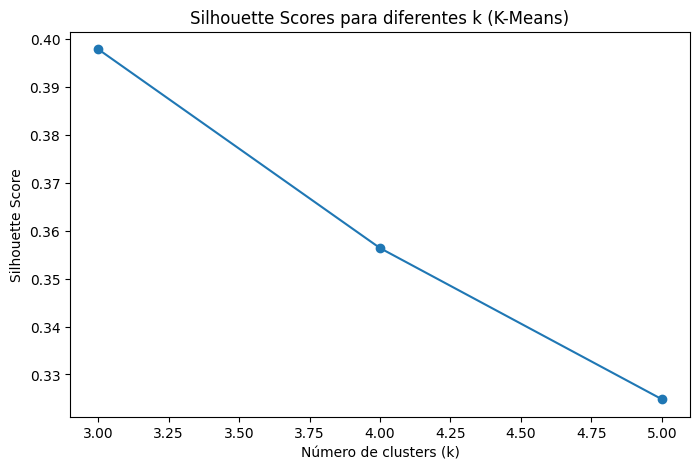

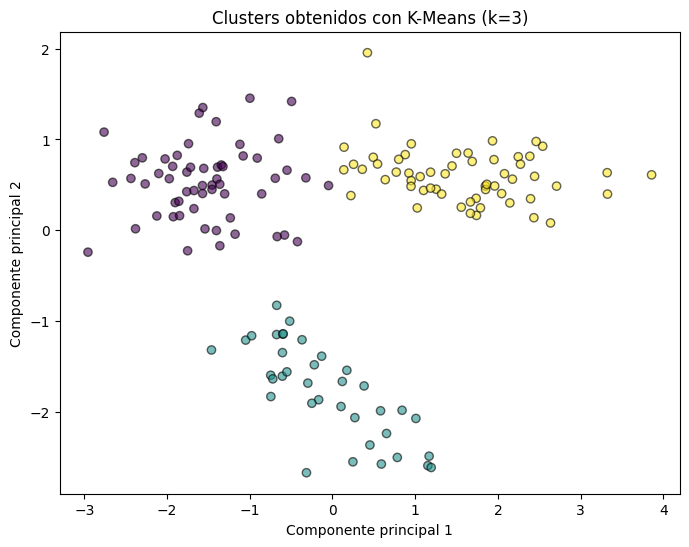

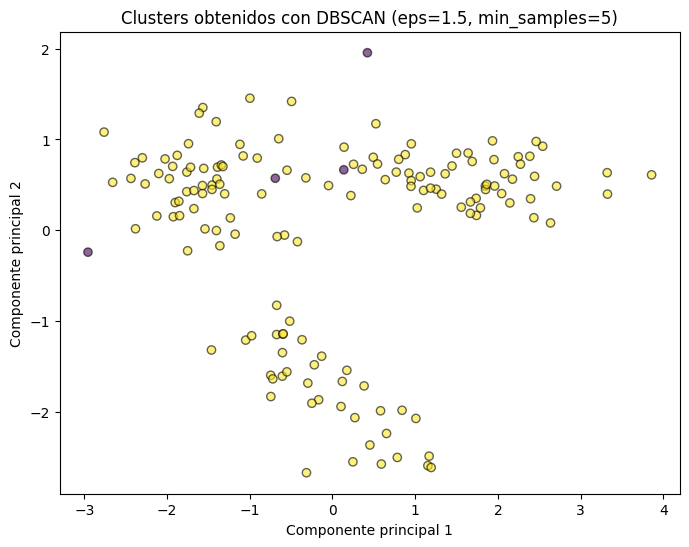

Discusión de resultados:
- K-Means: 3 clusters seleccionados basados en silhouette score.
- DBSCAN: Mejores hiperparámetros encontrados eps=1.5, min_samples=5.

DBSCAN es capaz de detectar ruido y manejar formas arbitrarias, mientras que K-Means asume clusters esféricos.


In [33]:

# Visualizar los primeros datos y entender las dimensiones
display(data.head())
display(data.info())

# Paso 3: MiniEDA
# Visualizar distribuciones y relaciones entre pares de características
sns.pairplot(data)
plt.show()

# Comprobar estadísticas descriptivas
display(data.describe())

# Escalado de las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, edgecolor='k')
plt.title("Datos proyectados en 2D (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

# Paso 4: Clustering - K-Means
# Probar diferentes valores de k (3 a 5 como sugiere la nota orientativa)
k_values = range(3, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels_kmeans)
    silhouette_scores.append(silhouette_avg)

# Visualizar la puntuación de silhouette para cada valor de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores para diferentes k (K-Means)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Elegir el mejor k basado en el silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Visualización de los clusters de K-Means
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.title(f"Clusters obtenidos con K-Means (k={best_k})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

# Paso 5: Clustering - DBSCAN
# Probar diferentes combinaciones de eps y min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(data_scaled)

        # Calcular silhouette solo si hay más de 1 cluster
        if len(set(labels_dbscan)) > 1:
            silhouette_avg = silhouette_score(data_scaled, labels_dbscan)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

# Entrenar DBSCAN con los mejores hiperparámetros
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = best_dbscan.fit_predict(data_scaled)

# Visualización de los clusters de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.title(f"Clusters obtenidos con DBSCAN (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

# Paso 6: Discusión
print("Discusión de resultados:")
print(f"- K-Means: {best_k} clusters seleccionados basados en silhouette score.")
print(f"- DBSCAN: Mejores hiperparámetros encontrados eps={best_eps}, min_samples={best_min_samples}.")
print("\nDBSCAN es capaz de detectar ruido y manejar formas arbitrarias, mientras que K-Means asume clusters esféricos.")


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

Columnas de empowering_drinks: ['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']
Columnas de new_experiments: ['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']


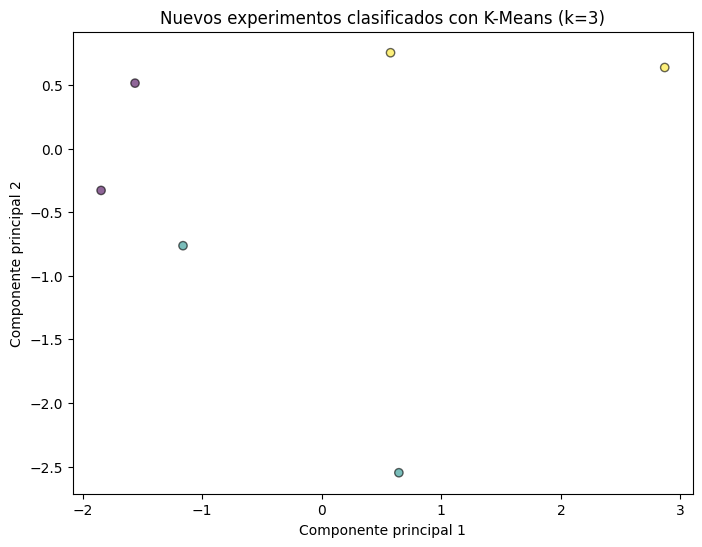

Las predicciones para los nuevos experimentos han sido guardadas en './data/new_experiments_classified.csv'


In [34]:
# Cargar los nuevos experimentos, asegurándonos de que el delimitador sea correcto (suponiendo que | es el separador)
new_experiments = pd.read_csv('./data/new_experiments.csv', delimiter='|')

# Limpiar los nombres de las columnas
new_experiments.columns = [col.strip() for col in new_experiments.columns]

# Verificar que las columnas ahora coincidan con las de empowering_drinks
print("Columnas de empowering_drinks:", data.columns.tolist())
print("Columnas de new_experiments:", new_experiments.columns.tolist())

# Comprobar que las columnas de new_experiments están en el mismo orden que en empowering_drinks
if set(data.columns) != set(new_experiments.columns):
    print("Advertencia: Las columnas no coinciden exactamente.")
    print("Columnas de 'data':", data.columns)
    print("Columnas de 'new_experiments':", new_experiments.columns)

    # Asegurarse de que las columnas de 'new_experiments' están en el mismo orden que las de 'data'
    new_experiments = new_experiments[data.columns]

# Escalar los nuevos datos con el mismo escalador
new_experiments_scaled = scaler.transform(new_experiments)

# Reducir dimensionalidad para visualización (opcional)
new_experiments_pca = pca.transform(new_experiments_scaled)

# Predecir clusters usando el modelo de K-Means
new_experiments_labels = kmeans.predict(new_experiments_scaled)

# Visualizar la clasificación de los nuevos experimentos
plt.figure(figsize=(8, 6))
plt.scatter(
    new_experiments_pca[:, 0], 
    new_experiments_pca[:, 1], 
    c=new_experiments_labels, 
    cmap='viridis', 
    alpha=0.6, 
    edgecolor='k'
)
plt.title(f"Nuevos experimentos clasificados con K-Means (k={best_k})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

# Guardar las predicciones en un archivo CSV para los químicos
new_experiments['Cluster'] = new_experiments_labels
new_experiments.to_csv('./data/new_experiments_classified.csv', index=False)

print("Las predicciones para los nuevos experimentos han sido guardadas en './data/new_experiments_classified.csv'")


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.